In [ ]:
import torch
import numpy as np

from groundingdino.util.inference import load_model
from segment_anything import sam_model_registry, SamPredictor

from utils import GroundingSAM

# GroundingSAM
Concatenating [GroundingDINO](https://arxiv.org/abs/2303.05499) with [Segment Anything](https://arxiv.org/abs/2304.02643) (SAM) model to segment text prompted objects in an image

Download GroundingDINO weights from [Github](https://github.com/IDEA-Research/GroundingDINO) and same for [SAM](https://github.com/facebookresearch/segment-anything) (better ViT-H)

The same demo can be rewritten using [SAM2](https://github.com/facebookresearch/sam2) maybe leading to better segmentation (?)

In [2]:
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [3]:
G_DINO_CONFIG = "groundingdino/config/GroundingDINO_SwinT_OGC.py"
G_DINO_WEIGHTS = "weights/groundingdino_swint_ogc.pth"

SAM_MODEL_TYPE = "vit_h"  
SAM_CHECKPOINT = "SAM_checkpoint/sam_vit_h.pth" 

In [4]:
# Load GroundingDINO model
g_dino = load_model(G_DINO_CONFIG, G_DINO_WEIGHTS).to(device)



# Load the SAM model
sam = sam_model_registry[SAM_MODEL_TYPE](checkpoint = SAM_CHECKPOINT).to(device)

# Initialize the Predictor
SAM = SamPredictor(sam)

/home/mario/miniconda3/lib/python3.9/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [5]:
IMAGE_PATH = "cielo1.png"
TEXT_PROMPT = "sky"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

## Sky view factor

/home/mario/miniconda3/lib/python3.9/site-packages/transformers/modeling_utils.py:1141: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/mario/miniconda3/lib/python3.9/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/mario/miniconda3/lib/python3.9/site-packages/torch/utils/checkpoint.py:86: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/home/mario/sa2va/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. P

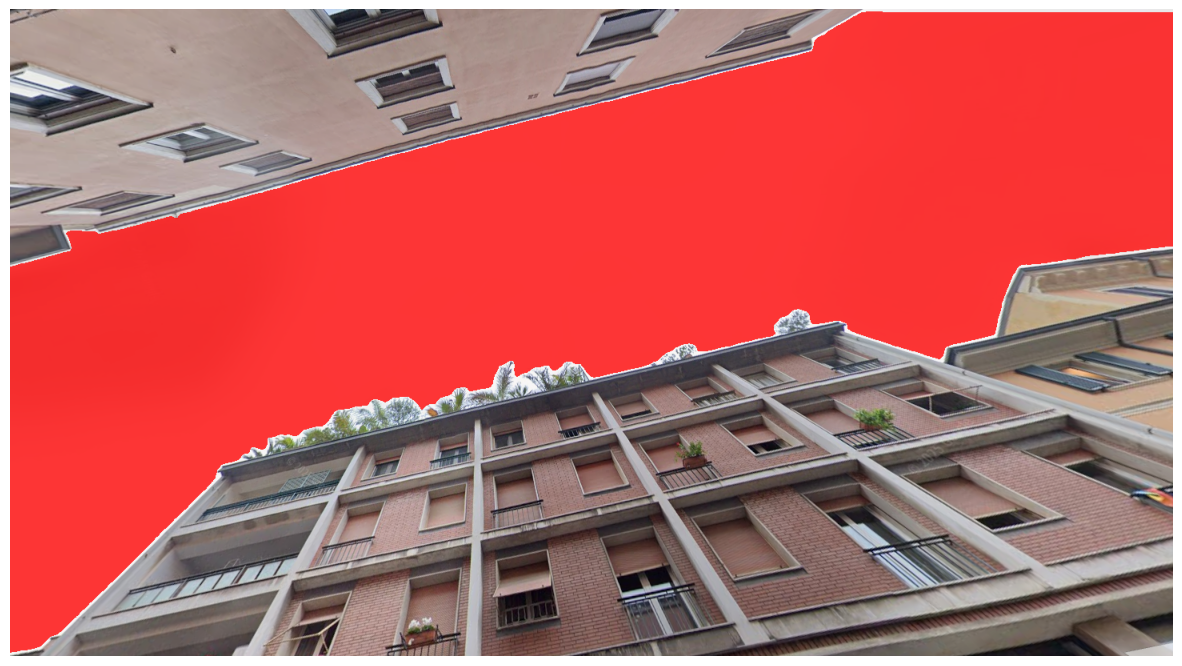

In [6]:
sam_mask, _ = GroundingSAM(g_dino, SAM, IMAGE_PATH, TEXT_PROMPT, BOX_TRESHOLD, TEXT_TRESHOLD, False)

At first sight sky segmentation works as well as Sa2VA (it employs SAM2)

In [7]:
print('Sky view factor:', np.sum(sam_mask)/(sam_mask.shape[1]*sam_mask.shape[2]))

Sky view factor: 0.4362442467223107


## Windows area factor (???)

/home/mario/miniconda3/lib/python3.9/site-packages/transformers/modeling_utils.py:1141: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/mario/miniconda3/lib/python3.9/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/mario/miniconda3/lib/python3.9/site-packages/torch/utils/checkpoint.py:86: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/home/mario/sa2va/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. P

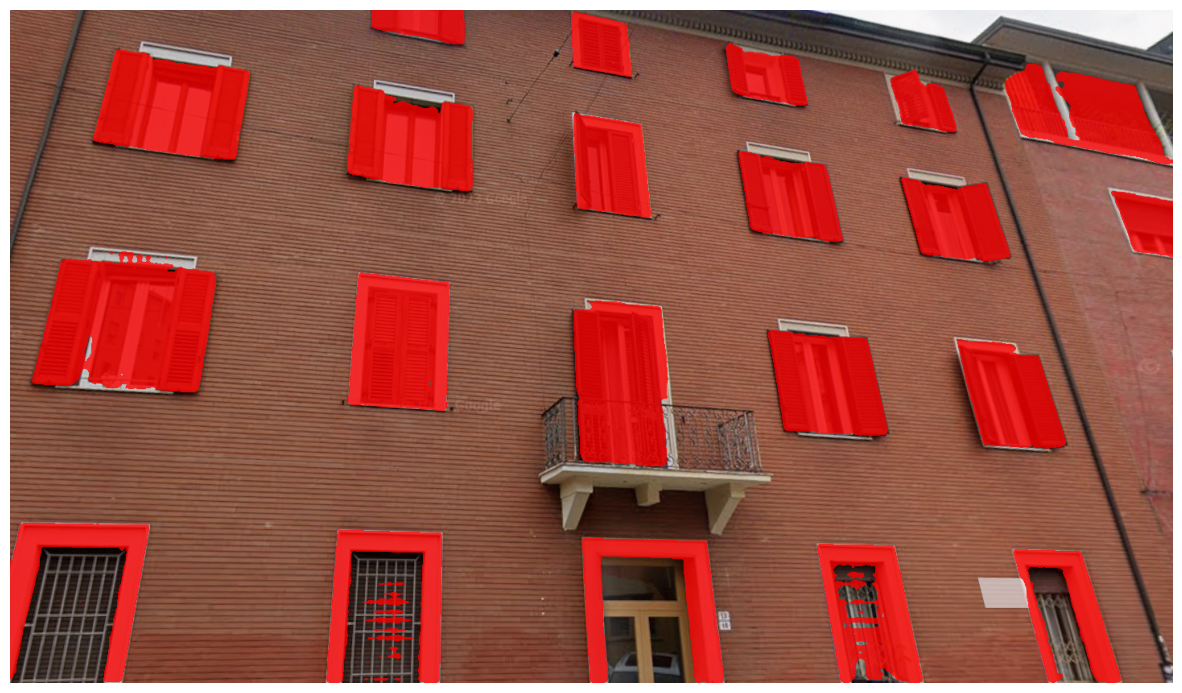

In [8]:
sam_mask, boxes = GroundingSAM(g_dino, SAM, 'palazzo3.png', 'windows', BOX_TRESHOLD, TEXT_TRESHOLD, False)

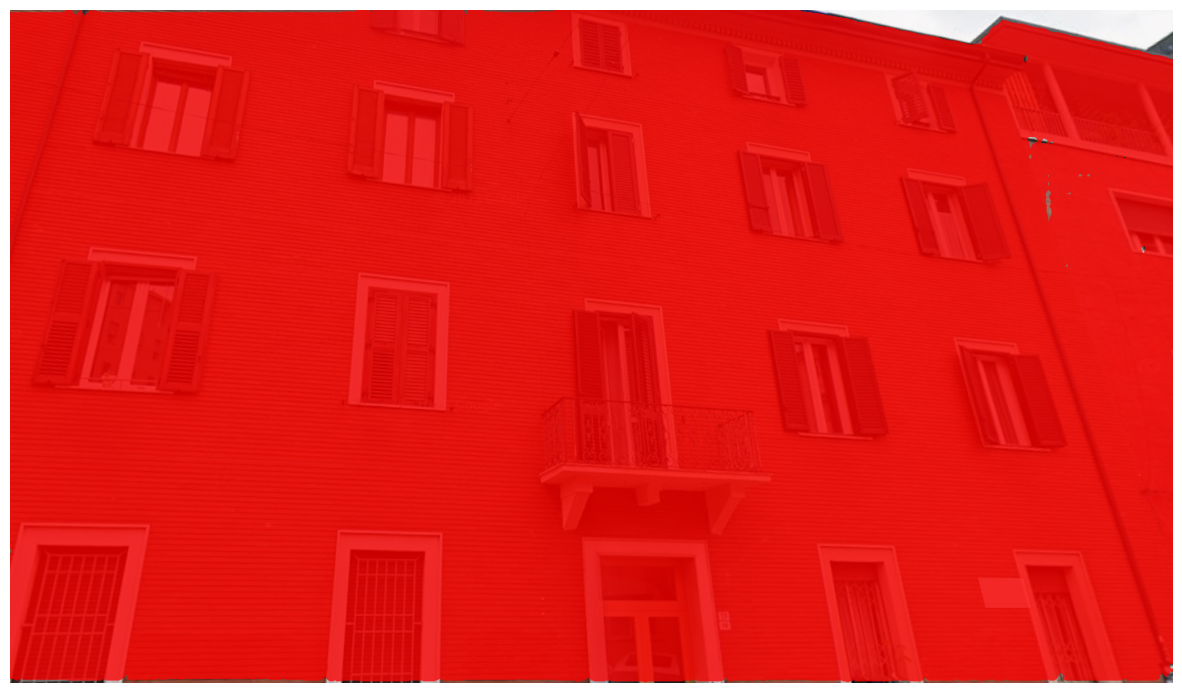

In [9]:
sam_mask_building, _ = GroundingSAM(g_dino, SAM, 'palazzo3.png', 'building', BOX_TRESHOLD, TEXT_TRESHOLD, False)

In [10]:
print('Windows area factor:', np.sum(sam_mask)/np.sum(sam_mask_building))
print('Number of windows: ', len(boxes))

Windows area factor: 0.22163711634162292
Number of windows:  21


## Graffiti

/home/mario/miniconda3/lib/python3.9/site-packages/transformers/modeling_utils.py:1141: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/mario/miniconda3/lib/python3.9/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/mario/miniconda3/lib/python3.9/site-packages/torch/utils/checkpoint.py:86: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/home/mario/sa2va/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. P

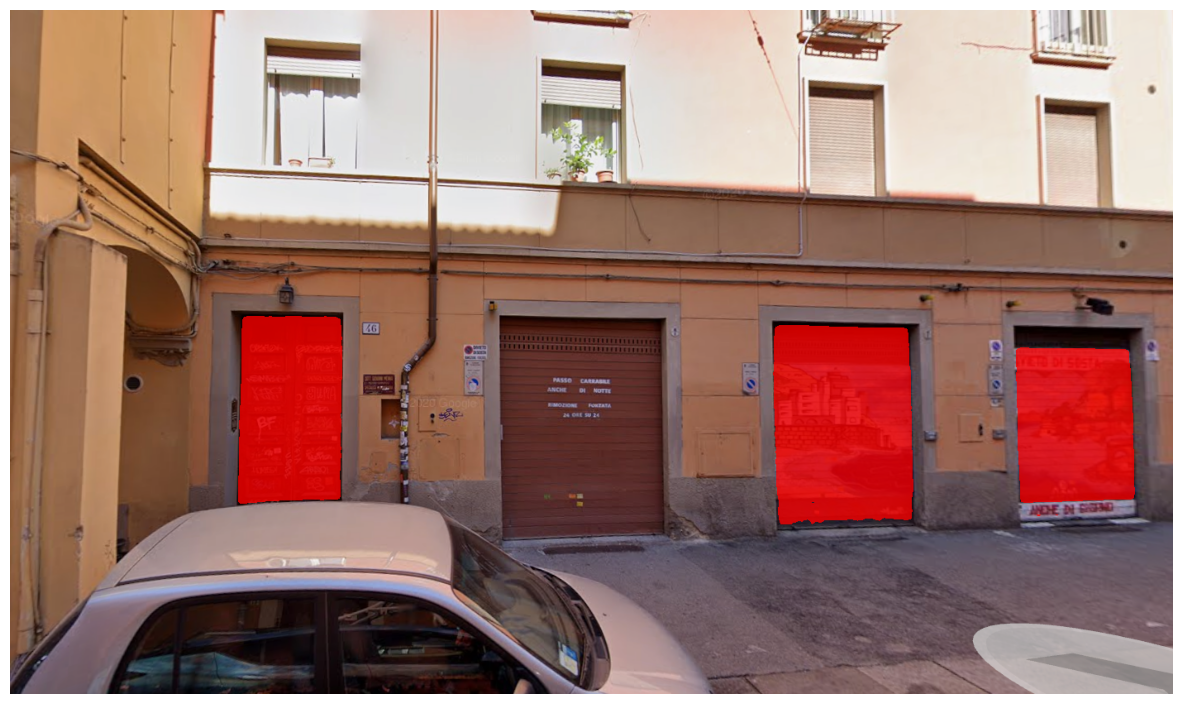

In [11]:
sam_mask_building, box = GroundingSAM(g_dino, SAM, 'graffiti1.png', 'graffiti', BOX_TRESHOLD, TEXT_TRESHOLD, False)